In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\Sagar Kandpal\Desktop\ML EXAMPLE\Modular\ML_Live_Class\data\iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
df['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

<AxesSubplot:xlabel='species', ylabel='count'>

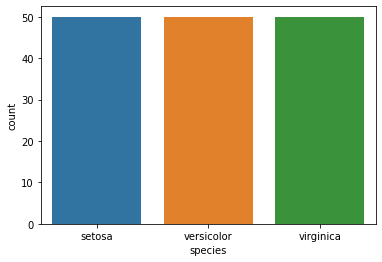

In [8]:
sns.countplot(x='species', data = df)

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

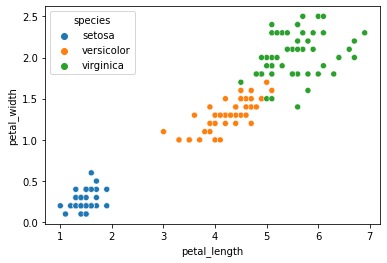

In [9]:
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = df, hue = 'species')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

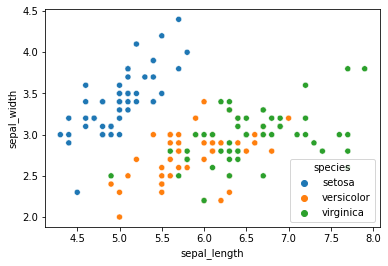

In [10]:
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = df, hue = 'species')

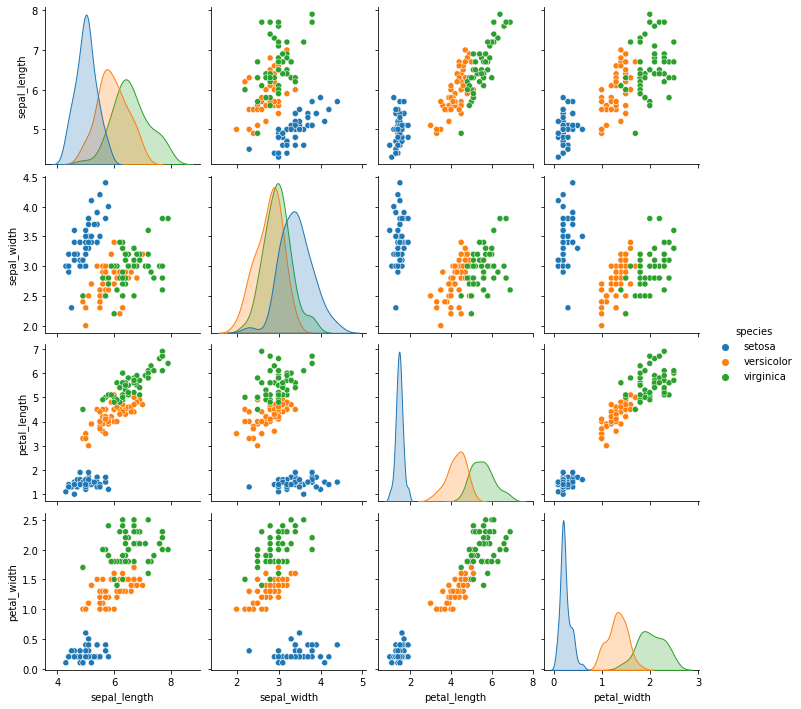

In [11]:
sns.pairplot(df, hue = 'species')

<AxesSubplot:>

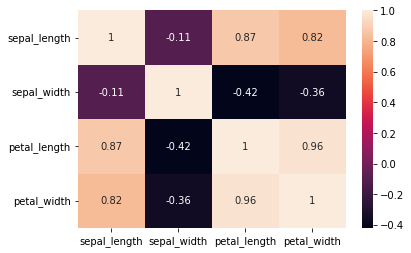

In [12]:
sns.heatmap(df.corr(), annot = True)

In [13]:
X = df.drop('species', axis =1)

In [14]:
y = df['species']

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df.shape

(150, 5)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
                                                    X, y, test_size=0.25, random_state=101)

In [19]:
scaler = StandardScaler()

In [20]:
scaled_X_train = scaler.fit_transform(X_train)

In [21]:
scaled_X_test = scaler.transform(X_test)

# Training and Performance Evaluation

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
log_model = LogisticRegression(solver = 'saga', multi_class = 'ovr', max_iter = 10000)

In [25]:
penalty = ['l1', 'l2', 'elasticnet']
l1_ratio = np.linspace(0,1,20)
C = np.logspace(0,10,20)
param_grid = {'penalty': penalty, 'l1_ratio': l1_ratio, 'C': C}

In [26]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [27]:
grid_model.fit(scaled_X_train, y_train)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\linear_model\_logistic.py:1479: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  "(penalty={})".format(self.penalty)
C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklea

GridSearchCV(estimator=LogisticRegression(max_iter=10000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [28]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix

In [29]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [30]:
y_pred = grid_model.predict(scaled_X_test)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

In [31]:
accuracy_score(y_test, y_pred)

0.9736842105263158

In [32]:
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0, 17,  0],
       [ 0,  1, 10]], dtype=int64)

C:\Users\Sagar Kandpal\anaconda3\envs\mltest\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


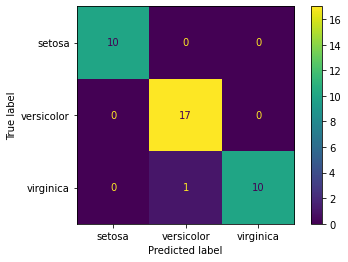

In [33]:
plot_confusion_matrix(grid_model, scaled_X_test, y_test)

In [34]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



In [35]:
# WHY WITHOUT ENCODING i AM ABLE TO DO CLASSFICATION DESPITE HAVING CATEGORIES

In [36]:
from sklearn.metrics import plot_roc_curve, roc_curve, auc

In [37]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

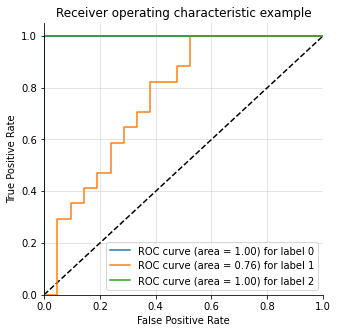

In [38]:
plot_multiclass_roc(grid_model, scaled_X_test, y_test, n_classes =3)